# ***Yashika Tirkey***

***OIBSIP Task2 - Email Spam Detection***


In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

In [20]:
data = pd.read_csv('spam.csv', encoding_errors= 'replace')

In [21]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [22]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [23]:
data.shape

(5572, 2)

In [24]:
data.duplicated().sum()

403

In [25]:
data = data.drop_duplicates()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


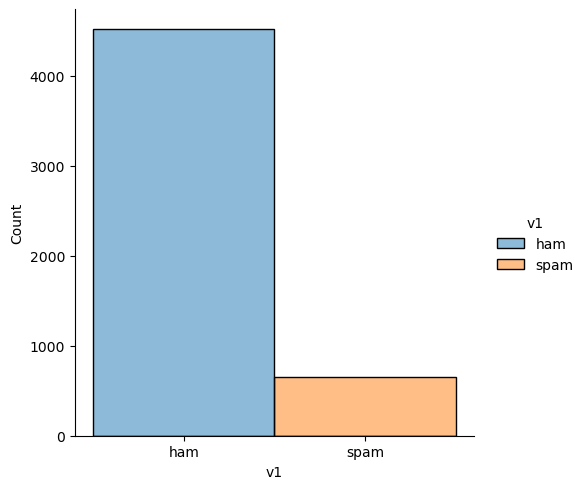

In [27]:
sns.displot(x=data['v1'], hue=data['v1'])

In [28]:
import string

def sent_to_tokens(obj):
    l = []
    for t in nltk.word_tokenize(obj):
        if t.isalpha() and t not in stopwords and t not in string.punctuation:
            l.append(t)
    return " ".join(l)
        

In [29]:
data['v2'] = data['v2'].apply(sent_to_tokens)

In [30]:
data['v2'][1]

'Ok lar Joking wif u oni'

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])

In [32]:
data

,v1,v2
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry wkly comp win FA Cup final tkts May...
3,0,U dun say early hor U c already say
4,0,Nah I think goes usf lives around though
...,...,...
5567,1,This time tried contact U Pound prize claim ea...
5568,0,Will b going esplanade fr home
5569,0,Pity mood So suggestions
5570,0,The guy bitching I acted like interested buyin...


In [40]:
x = data['v2']
y = data['v1']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english")

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [43]:
X_train_features = feature_extraction.fit_transform(x_train).toarray()
X_test_features = feature_extraction.transform(x_test).toarray()

In [44]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [45]:
x_train.shape

(4135,)

In [46]:
x_test.shape

(1034,)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_features,y_train)
y_pred_lr = lr.predict(X_test_features)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr)*100,'%')

95.45454545454545 %


In [48]:
Scores_lr = pd.DataFrame({'Actual':y_test,'Predictions':y_pred_lr})
Scores_lr.head(10)

,Actual,Predictions
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
1520,1,1
1159,0,0
3986,1,1
3217,0,0
539,0,0


     0 = Ham
     1 = Spam

In [49]:
input_msg = ["hi, please be Quick... I'm waiting."]
input_data_features = feature_extraction.transform(input_msg)
predection = lr.predict(input_data_features)

if predection == [0]:
    print("Ham")
else:
    print("Spam")

Ham


In [51]:
input_msg = ["IMPORTANT MESSAGE. This is a final contact attempt. You have important messages waiting out our customer claims dept. Expires 13/4/04. Call 08717507382 NOW!"]
input_data_features = feature_extraction.transform(input_msg)
predection = lr.predict(input_data_features)

if predection == [0]:
    print("Ham")
else:
    print("Spam")

Spam


In [52]:
input_msg = ["You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p på£3.99"]
input_data_features = feature_extraction.transform(input_msg)
predection = lr.predict(input_data_features)

if predection == [0]:
    print("Ham")
else:
    print("Spam")

Spam
